# ใช้ Matplotlib แสดงกราฟ

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager, rcParams, rcParamsDefault
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit
import numpy as np

font_manager.fontManager.addfont('thsarabunnew.ttf')
rc('font', family=['TH Sarabun New', 'DejaVu Sans'], size=14)

In [48]:
data1 = pd.read_csv('./lab_data/L6_data1.csv')
data2 = pd.DataFrame(data1, columns=['X', 'CH1', 'CH2', 'Increment', 'CH1+CH2'])
for index, row in data2.iterrows():
    if index == 0:
        continue
    data2.at[index, 'CH1+CH2'] = float(row['CH1']) + float(row['CH2'])

In [45]:
def make_graph(data, title, save_name, show_ch2=True, show_1graph=False, ch1_label='CH1', ch2_label='CH2', extra=None, extra_label=None):
    x = data.iloc[1:]['X'].astype(float) * data.iloc[0]['Increment'].astype(float)
    y = data.iloc[1:]['CH1'].astype(float)
    fig, axes = plt.subplots(1, 3 if extra and not show_1graph else 2 if show_ch2 and not show_1graph else 1, figsize=(15, 5))
    if show_ch2:
        if show_1graph:
            axes.grid()
            axes.plot(x, y, label=ch1_label)
            y = data.iloc[1:]['CH2'].astype(float)
            axes.plot(x, y, label=ch2_label)
            if extra:
                axes.plot(x, data.iloc[1:][extra], label=extra_label)
            fig.legend()
        else:
            axes[0].grid()
            axes[0].plot(x, y, label=ch1_label)
            axes[0].set_title(ch1_label)
            axes[1].grid()
            y = data.iloc[1:]['CH2'].astype(float)
            axes[1].plot(x, y, label=ch2_label)
            axes[1].set_title(ch2_label)
            if extra:
                axes[2].grid()
                axes[2].plot(x, data.iloc[1:][extra], label=extra_label)
                axes[2].set_title(extra_label)
    else:
        axes.grid()
        axes.plot(x, y, label=ch1_label)
        axes.set_title(ch1_label)
    fig.supxlabel('Time (s)')
    fig.supylabel('Voltage (V)')
    fig.suptitle(title)
    fig.savefig('./lab_data/' + save_name)
    plt.show()

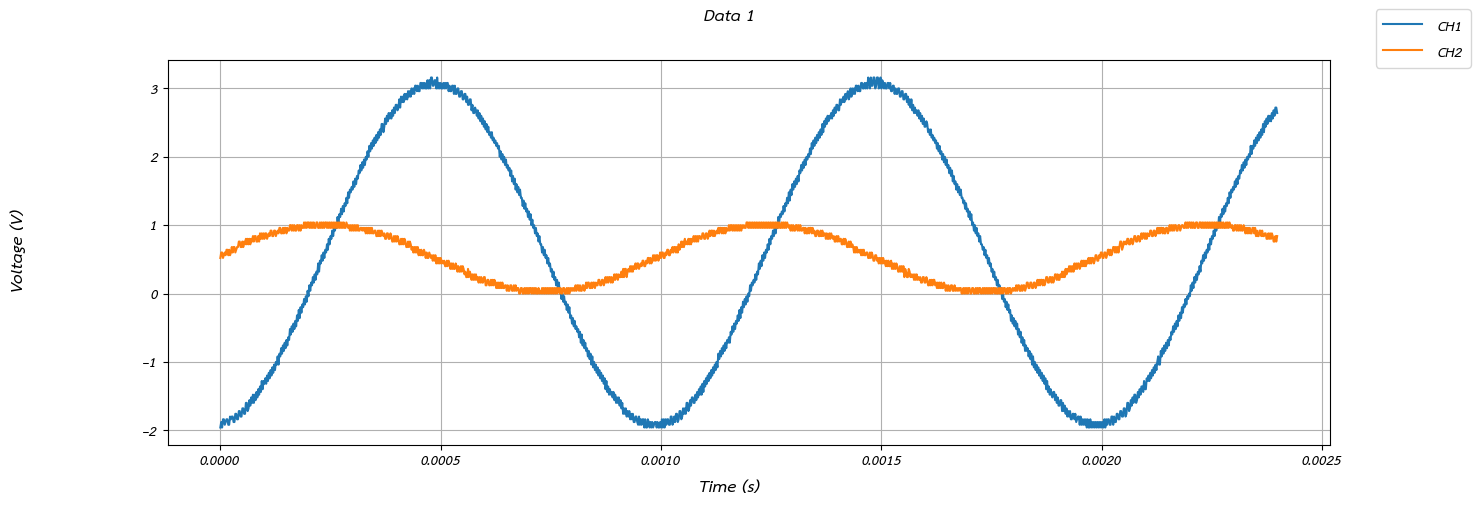

In [50]:
make_graph(data1, 'Data 1', 'L6_fig1.png', show_1graph=True)

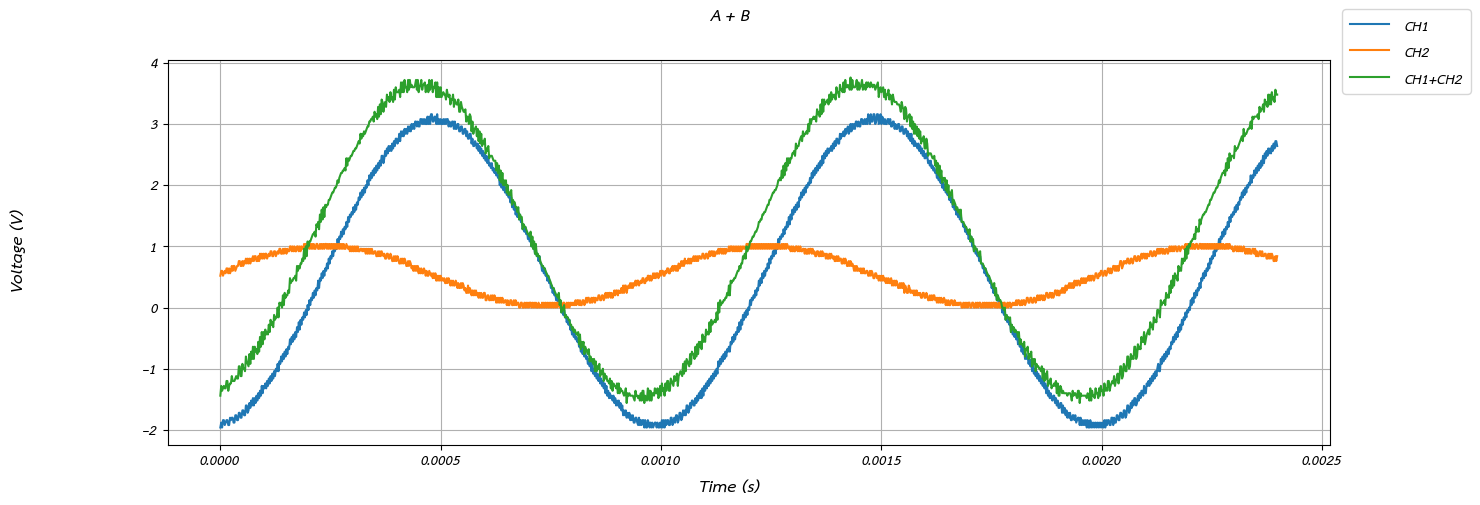

In [49]:
make_graph(data2, 'A + B', 'L6_fig2.png', show_1graph=True, extra='CH1+CH2', extra_label='CH1+CH2')